In [1]:
import myutil as mu
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset  # 텐서데이터셋
from torch.utils.data import DataLoader  # 데이터로더
from torch.utils.data import Dataset
import matplotlib.pyplot as plt  # 맷플롯립사용
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import random
from sklearn.datasets import load_digits



--- 
 - 다층 퍼셉트론으로 손글씨 분류하기 
   - 이번 챕터에서는 다층 퍼셉트론을 구현하고, 딥 러닝을 통해서 숫자 필기 데이터를 분류해봅시다. 
   - MNIST 데이터랑 다른 데이터입니다. 


--- 
 - 숫자 필기 데이터 소개 
   - 숫자 필기 데이터는 사이킷런 패키지에서 제공하는 분류용 예제 데이터입니다. 
   - 0부터 9까지의 숫자를 손으로 쓴 이미지 데이터로 load_digits() 명령으로 로드할 수 있습니다. 
   - 각 이미지는 0부터 15까지의 명암을 가지는 8 × 8 = 64 픽셀 해상도의 흑백 이미지입니다. 
   - 그리고 해당 이미지가 1,797개가 있습니다. 
   - load_digits()를 통해 이미지 데이터를 로드할 수 있습니다. 
   - 로드한 전체 데이터를 digits에 저장합니다. 


len(digits.images) : 1797


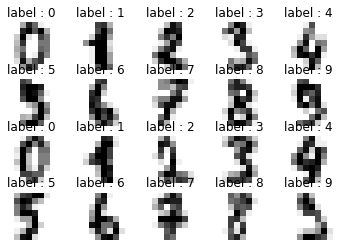

In [2]:


digits = load_digits()
mu.log("len(digits.images)", len(digits.images))

images_labels = list(zip(digits.images, digits.target))
sub_sample_size = 20

for i, (image, label) in enumerate(images_labels[:sub_sample_size]):
    plt.subplot(4, 5, i + 1)
    plt.axis("off")
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    plt.title("label : {}".format(label))

plt.show()



--- 
 - 다층 퍼셉트론 분류기 만들기 



model : 
    Sequential(
      (0): Linear(in_features=64, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=16, bias=True)
      (3): ReLU()
      (4): Linear(in_features=16, out_features=10, bias=True)
    ) 
    0.weight    torch.Size([32, 64])
        tensor([[ 0.0997,  0.0345, -0.0828,  ...,  0.0932,  0.0155,  0.0289],
            [ 0.0426, -0.0340, -0. ...
    0.bias    torch.Size([32])
        tensor([ 0.0376,  0.0552, -0.1105, -0.0355,  0.1192, -0.1036, -0.0462, -0.0874,
             0.0815, -0. ...
    2.weight    torch.Size([16, 32])
        tensor([[-0.0491,  0.0302, -0.0743,  0.1723,  0.1296, -0.1708, -0.1053,  0.1500,
              0.0231,   ...
    2.bias    torch.Size([16])
        tensor([-0.0699,  0.1617, -0.0393,  0.0870, -0.1480,  0.1086,  0.1668, -0.0011,
             0.0289, -0. ...
    4.weight    torch.Size([10, 16])
        tensor([[-0.2335, -0.0894, -0.0375, -0.1697, -0.1320, -0.0400,  0.1439, -0.0951,
              0

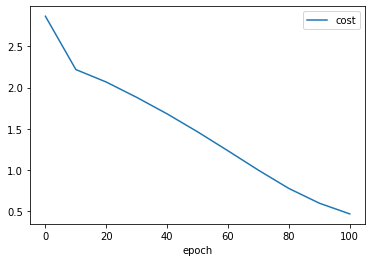

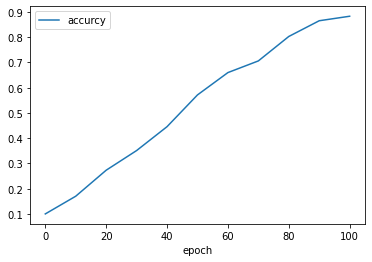


model : 
    Sequential(
      (0): Linear(in_features=64, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=16, bias=True)
      (3): ReLU()
      (4): Linear(in_features=16, out_features=10, bias=True)
    ) 
    0.weight    torch.Size([32, 64])
        tensor([[ 0.0997,  0.1295,  0.0040,  ...,  0.1901,  0.0295, -0.0690],
            [ 0.0426, -0.1060,  0. ...
    0.bias    torch.Size([32])
        tensor([ 0.0975,  0.1103, -0.0637, -0.0516,  0.1063, -0.0336, -0.0405, -0.0708,
             0.1299, -0. ...
    2.weight    torch.Size([16, 32])
        tensor([[-0.0597,  0.0599, -0.0134,  0.1578,  0.1164, -0.1427, -0.1426,  0.1501,
             -0.0191,   ...
    2.bias    torch.Size([16])
        tensor([-0.0803,  0.1721,  0.0289,  0.0806, -0.1534,  0.0998,  0.1502, -0.0350,
            -0.0094, -0. ...
    4.weight    torch.Size([10, 16])
        tensor([[-0.2424, -0.0088, -0.0053, -0.1640, -0.1544, -0.1191,  0.1416, -0.1292,
              0

In [3]:


model = nn.Sequential(
    nn.Linear(64, 32),  # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16),  # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16, 10)  # hidden_layer3 = 16, output_layer = 10
)

mu.log("model", model)

X = digits.data  # 이미지. 즉, 특성 행렬
Y = digits.target  # 각 이미지에 대한 레이블

mu.log("len(X)", len(X))
mu.log("X[0].shape", X[0].shape)
mu.log("len(Y)", len(Y))
mu.log("Y[0].shape", Y[0].shape)

X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())
nb_epochs = 100
mu.plt_init()

for epoch in range(nb_epochs + 1):
    y_pred = model(X)
    loss = loss_fn(y_pred, Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        accuracy = mu.get_cross_entropy_accuracy(y_pred, Y)
        mu.log_epoch(epoch, nb_epochs, loss, accuracy)

mu.plt_show()

mu.log("model", model)



--- 
 accuracy 측정 


In [4]:


with torch.no_grad():
    prediction = model(X)
    accuracy = mu.get_cross_entropy_accuracy(prediction, Y)
    mu.log("accuracy", accuracy)



accuracy : 0.8881469115191987


--- 
 랜덤 5 항목 테스트 


--------------------------------------------------------------------------------
r : 525
X_single_data.shape : torch.Size([1, 64])

Y_single_data : 
    torch.Size([1]) tensor([9])

single_prediction : 
    torch.Size([1, 10]) tensor([[ 1.1146, -3.5766, -2.0661, -1.3225, -6.1369, -2.4297, -6.9093, -2.7010,
             -1.5607,   ...

single_prediction_res : 0


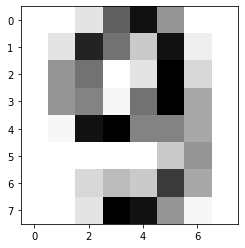

--------------------------------------------------------------------------------
r : 479
X_single_data.shape : torch.Size([1, 64])

Y_single_data : 
    torch.Size([1]) tensor([1])

single_prediction : 
    torch.Size([1, 10]) tensor([[-5.1507,  4.0638,  1.4524,  0.8814, -0.3493, -2.1505, -4.8154, -2.7690,
              1.1666, - ...

single_prediction_res : 1


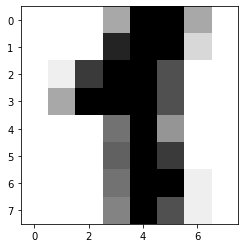

--------------------------------------------------------------------------------
r : 680
X_single_data.shape : torch.Size([1, 64])

Y_single_data : 
    torch.Size([1]) tensor([6])

single_prediction : 
    torch.Size([1, 10]) tensor([[-6.0806, -3.5214, -2.5325, -8.8002,  0.8262, -1.6200,  4.7416, -4.4065,
             -1.2311, - ...

single_prediction_res : 6


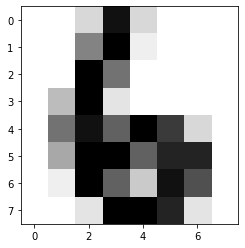

--------------------------------------------------------------------------------
r : 1605
X_single_data.shape : torch.Size([1, 64])

Y_single_data : 
    torch.Size([1]) tensor([3])

single_prediction : 
    torch.Size([1, 10]) tensor([[-0.9508,  0.2779, -0.3369,  1.0143, -1.2535, -1.4012, -4.6985,  0.2857,
              1.4545, - ...

single_prediction_res : 8


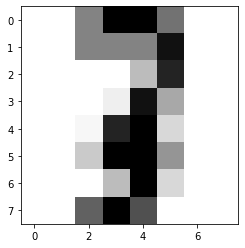

--------------------------------------------------------------------------------
r : 1069
X_single_data.shape : torch.Size([1, 64])

Y_single_data : 
    torch.Size([1]) tensor([8])

single_prediction : 
    torch.Size([1, 10]) tensor([[-2.1057, -1.5926, -0.0422,  0.3949, -3.4106, -2.9038, -5.7972, -2.0682,
              1.9042, - ...

single_prediction_res : 8


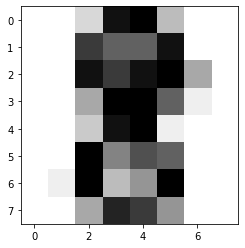

In [5]:


for _ in range(5):
    print("-" * 80)
    r = random.randint(0, len(X) - 1)
    mu.log("r", r)
    X_single_data = X[r:r + 1]
    mu.log("X_single_data.shape", X_single_data.shape)
    Y_single_data = Y[r:r + 1]
    mu.log("Y_single_data", Y_single_data)
    single_prediction = model(X_single_data)
    mu.log("single_prediction", single_prediction)
    single_prediction_res = torch.argmax(single_prediction, 1).item()
    mu.log("single_prediction_res", single_prediction_res)
    mu.plt_img_show(X_single_data.view(8, 8))
